# PHASE 3 FINAL PROJECT


#### Here are the group members of this project
-  Peris Wamoni
- Wendy Muturi
- Valary Thairu
- Lorna Wanjiku
- Mark Nyumba
- Dennis Wainaina

## 1. BUSINESS UNDERSTANDING

### 1.1 INTRODUCTION

San Fransisco National Hospital is a famous national hospital known for its world-class healthcare and its stellar quality of service. They have served the community for over 50 years and are known as a centre of excellence. This hospital has many departments one of which is the Cardiothoracic department which is responsible for research on heart problems and if need be surgery to the respective patients.

However, in recent times the research department of the Cardiothoracic department has discovered that there has been an increase in the rate of cardiovascular diseases in its patients and they cannot seem to discover the reason why. After much deliberation, they have decided to hire a known and established Data Science firm known as Phoenix Incorporated. This is to investigate the factors that have lead to the increase in cardiovascular diseases in their patients, so as to know how they can reduce such prevalent cases in the future.

In order to do this a team of 6 data scientists in the firm has been assigned this task by the head Data scientist in the firm, who has received this project from the Head of research in the Cardiothoracic department of the hospital. The team is to discover the factors that lead to the increase of cardiovascular diseases in patients and are also to build a model that predicts whether a model is at risk of cardiovascular diseases. Insights generated from this analysis are to be presented to the head data scientist who will then present it to the head of research at the Cardiothoracic department. They are also supposed to present their findings to the board of members at the hospital of which also the head Data Scientist will be present. The thorough analysis will then be used by the research department so as to figure out a way forward.


### 1.2 OBJECTIVES
- To determine factors that increase the likelihood of a person developing cardiovascular diseases.

- To build a predictive model to know if an individual is at risk for cardiovascular diseases.

- To present findings to the Lead Data Scientist.

- To make a presentation to the board of members of the hospital in regards to the same.

### 1.3 PROBLEM STATEMENT
To discover the factors that increase the chances of patients getting cardiovascular diseases. This is to help San Fransisco National hospital discover the factors that have led to an increase in cardiovascular diseases in their patients.

### 1.4 MEASURE OF SUCCESS
The goal is to discover the factors that lead to an increase in cardiovascular diseases in patients and to build a model to predict the same. The measure of success will therefore be when these factors have been discovered and how these factors lead to an increase in the rate of cardiovascular diseases in patients. The model build to predict such factors should have an accuracy, prediction, recall and f1_score of at least 90% so that the project can be considered a success.

## 2. DATA UNDERSTANDING
The data sourced for this project was the "Cardiovascular Diseases Risk Prediction Dataset" which was sourced from Kaggle. The columns in this dataset include the following:

- **General Health**: This is a measure of the degree of health of the patient which ranges from poor to excellent.

- **Checkup**: This is how long it has been since the patient's last checkup.

- **Exercise**: A column of yes and no of whether the patient has participated in exercise during the past month.

- **Skin_Cancer**: Whether or not a patient has skin cancer.

- **Other_Cancer**: Whether or not a patient has other cancers apart from skin cancer.

- **Depression**: Whether or not a patient has depression or not.

- **Diabetes**: Whether or not a patient has Diabetes.

- **Arthritis**: Whether or not a patient has Arthritis.

- **Sex**: The gender of a patient be it male or female.

- **Age_category**: The range of ages in which a patient falls into be it 60-64, 75-79 or even 80+ years

- **Height**: The height of a patient in centimeters.

- **Weight**: The weight of a patient in kilograms.

- **BMI**: The ratio of the height of a patient to his/her weight which shows whether a patient is under or overweight.

- **Smoking_history**: Whether or not a patient is a smoker or not.

- **Alcohol_Consumption**: The level of alcohol consumption of a patient.

- **Fruit_Consumption**: The level of fruit consumption of a patient.

- **Green_Vegetables_Consumption**: The level of green vegetable consumption of the patient.

- **FriedPotato_Consumption**: The level of fried potato consumption of the patient.


## 3. DATA PREPARATION

This phase of the CRISP-DM process is all about ensuring data is ready for analysis and modelling. It consists of various parts such as:
- **Dealing with missing values.**
- **Dealing with duplicates.**
- **Dealing with outliers.**
- **Dealing with wrong data types.**

It may also include several pre-processing steps such as:
- **Standardizing or normalizing depending on the algorithm to ensure all variables are within the same range.**
- **Splitting the data into train and test datasets to prevent data leakage.**
- **Dealing with class imbalance issues by oversampling the minority class or undersampling the minority class.**

#### First loading important libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score


Loading the dataset

In [3]:
df = pd.read_csv('CVD_cleaned.csv')

In [4]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


**We now want to convert each of the categorical variables to numeric since some of the categorical variables are ordinal(have a hierachy) and others are nominal(do not have a hierachy) we shall deal with each case specifically.**

Looking at the columns it appears only the **General_Health** column is ordinal hence we shall deal with it first before proceeding to deal with other categorical variables.

We first want to see the unique values in this column to see the hierachy of the variable.

In [5]:
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

The values range from **Poor** to **Excellent** we shall therefore replace these values with numbers ranging from 1 to 5.

In [7]:
replacement_dict = {'Poor':1, 'Fair':2, 'Good':3, 'Very Good':4, 'Excellent':5}
df['General_Health'] = df['General_Health'].replace(replacement_dict)

We shall also rename the column from General_Health to Scale_of_health so that the numbers make sense.

In [8]:
df.rename(columns = {'General_Health': 'Scale_of_health'}, inplace=True)

Seeing how the **Checkup** column looks like.

In [9]:
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

It is nominal hence we shall deal with it by one hot encoding.

Seeiing if there's class imbalance in the target variable.

In [10]:
df['Heart_Disease'].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

**There seems to be a class imbalance as the ratio of yes to no is greater than 10:1**

Just as an experiment we want to see what happens if we use dummy encoding on the checkup column.

In [11]:
pd.get_dummies(df, columns=['Checkup'], dtype=int)

,Scale_of_health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,1,No,No,No,No,No,No,Yes,Female,70-74,...,Yes,0.0,30.0,16.0,12.0,0,0,1,0,0
1,4,No,Yes,No,No,No,Yes,No,Female,70-74,...,No,0.0,30.0,0.0,4.0,0,0,0,0,1
2,4,Yes,No,No,No,No,Yes,No,Female,60-64,...,No,4.0,12.0,3.0,16.0,0,0,0,0,1
3,1,Yes,Yes,No,No,No,Yes,No,Male,75-79,...,No,0.0,30.0,30.0,8.0,0,0,0,0,1
4,3,No,No,No,No,No,No,No,Male,80+,...,Yes,0.0,8.0,4.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Yes,No,No,No,No,No,No,Male,25-29,...,No,4.0,30.0,8.0,0.0,0,0,0,0,1
308850,2,Yes,No,No,No,No,Yes,No,Male,65-69,...,No,8.0,15.0,60.0,4.0,0,0,0,1,0
308851,4,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,...,Yes,4.0,40.0,8.0,4.0,1,0,0,0,0
308852,4,Yes,No,No,No,No,No,No,Male,65-69,...,No,3.0,30.0,12.0,0.0,0,0,0,0,1


**Several new columns have been created one of each unique category in the checkup column of which 1 means yes and 0 means no.**

We now want to deal with the columns which have yes and no as their values the idea is to convert the values of yes to 1 and the values of no to 0 so as to encode them in a way the machine learning algorithm can read them.

In [12]:
specific_columns = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
replacement_dict = {'No': 0, 'Yes': 1}

for column in specific_columns:
    df[column] = df[column].replace(replacement_dict)

df

,Scale_of_health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,0,0,0,0,0,No,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,Within the past year,0,1,0,0,0,Yes,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,Within the past year,1,0,0,0,0,Yes,0,Female,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,Within the past year,1,1,0,0,0,Yes,0,Male,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,Within the past year,0,0,0,0,0,No,0,Male,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Within the past year,1,0,0,0,0,No,0,Male,25-29,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,2,Within the past 5 years,1,0,0,0,0,Yes,0,Male,65-69,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,4,5 or more years ago,1,0,0,0,1,"Yes, but female told only during pregnancy",0,Female,30-34,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,Within the past year,1,0,0,0,0,No,0,Male,65-69,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


We now want to deal with the **Age_Category** column as it is different from other columns to do this we shall do dummy encoding after checking for duplicates.

In [13]:
df['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [14]:
df[df.duplicated()]

,Scale_of_health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
46402,3,Within the past year,1,0,0,0,1,No,0,Female,18-24,163.0,81.65,30.90,0,0.0,60.0,4.0,4.0
49287,4,Within the past year,1,0,0,0,0,No,0,Female,35-39,160.0,72.57,28.34,1,0.0,60.0,30.0,4.0
75448,5,Within the past year,1,0,0,0,0,No,0,Female,65-69,163.0,61.23,23.17,1,0.0,30.0,16.0,0.0
76857,5,Within the past year,1,0,0,0,0,No,0,Male,40-44,173.0,81.65,27.37,0,0.0,30.0,8.0,1.0
78871,3,Within the past year,1,0,0,0,0,No,0,Female,75-79,163.0,58.97,22.31,0,0.0,60.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301474,3,Within the past year,1,0,0,0,0,No,1,Female,70-74,173.0,77.11,25.85,0,0.0,30.0,30.0,0.0
303040,4,Within the past year,1,0,0,0,0,No,0,Female,55-59,168.0,74.84,26.63,0,0.0,30.0,30.0,4.0
303600,3,Within the past year,1,0,0,0,0,No,0,Female,35-39,157.0,72.57,29.26,0,0.0,4.0,12.0,4.0
303609,4,Within the past year,1,0,0,0,0,No,0,Female,70-74,160.0,58.97,23.03,0,0.0,30.0,4.0,4.0


**There are duplicates but since this is medical data its possible for two or more people to have similar characteristics so we shall not remove them.**

The last step in dealing with categorical variables is to use dummy encoding so that each category in the nominal categorical variables gets its own column.

In [15]:
encoded_df = pd.get_dummies(df, dtype=int)
encoded_df

,Scale_of_health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Height_(cm),Weight_(kg),BMI,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,1,0,0,0,0,0,1,150.0,32.66,14.54,...,0,0,0,0,0,0,0,1,0,0
1,4,0,1,0,0,0,0,165.0,77.11,28.29,...,0,0,0,0,0,0,0,1,0,0
2,4,1,0,0,0,0,0,163.0,88.45,33.47,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,0,0,0,0,180.0,93.44,28.73,...,0,0,0,0,0,0,0,0,1,0
4,3,0,0,0,0,0,0,191.0,88.45,24.37,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,0,168.0,81.65,29.05,...,0,0,0,0,0,0,0,0,0,0
308850,2,1,0,0,0,0,0,180.0,69.85,21.48,...,0,0,0,0,0,0,1,0,0,0
308851,4,1,0,0,0,1,0,157.0,61.23,24.69,...,0,0,0,0,0,0,0,0,0,0
308852,4,1,0,0,0,0,0,183.0,79.38,23.73,...,0,0,0,0,0,0,1,0,0,0


**Since the process was successful we shall assume there are no wrong datatypes as they would have interfered with the encoding process.**

Checking for missing values

In [16]:
encoded_df.isnull().sum()

Scale_of_health                                        0
Exercise                                               0
Heart_Disease                                          0
Skin_Cancer                                            0
Other_Cancer                                           0
Depression                                             0
Arthritis                                              0
Height_(cm)                                            0
Weight_(kg)                                            0
BMI                                                    0
Smoking_History                                        0
Alcohol_Consumption                                    0
Fruit_Consumption                                      0
Green_Vegetables_Consumption                           0
FriedPotato_Consumption                                0
Checkup_5 or more years ago                            0
Checkup_Never                                          0
Checkup_Within the past 2 years

**There are no missing values in the dataset.**

The next step is to separate the variable into the target and feature variables and to deal with the class imbalance seen above.

In [17]:
y = encoded_df['Heart_Disease']  # Target variable
X = encoded_df.drop('Heart_Disease', axis=1)  # Feature variables

Dealing with class imbalance issues.

In [18]:
# Solving class imbalance
# Importing libraries


# Instatiating object
smote = SMOTE()

# Fitting and resampling
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()

Heart_Disease
0    283883
1    283883
Name: count, dtype: int64

After defining our target and feature variables and dealing with class imbalance we now want to split the dataset into training and test datasets so as to prevent data leakage during any pre-processing steps that may follow.

In [19]:
# Splitting dataset into train and test split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Since the machine learning algorithm we are going to use is **Logistic Regression** which applies regularization by default and is highly affected by different scales in the feature variables it is probably wise to scale the data before putting the data in the model.

In [20]:
# Instatiating object
scaler = StandardScaler()

# Fitting and transforming X_train and X_test
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


**Now that we are finished with the data cleaning and preprocessing steps our data preparation is finsished and we can move on to the next step.**

## 5. MODELLING

### 5.1 BASE MODEL

We want to see how a base model looks like with the preprocessed data at hand so that we can now how to continue based on the evaluation of the model.

In [21]:
# Let's see how a base model looks like

# Instatiating object
model = LogisticRegression()

# Fitting
model.fit(X_train_scaled, y_train)

# Making predictions on test and train
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

# Seeing accuracy, precision, recall and f1_score

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Precision scores
train_precision = precision_score(y_train, train_pred)
test_precision = precision_score(y_test, test_pred)

# Recall scores
train_recall = recall_score(y_train, train_pred)
test_recall = recall_score(y_test, test_pred)

# F1 scores
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

# Results
print('Accuracy of training data is', round(train_accuracy, 4) * 100,"%")
print('Accuracy of testing data is', round(test_accuracy, 4) * 100,"%")
print('Precision of training data is', round(train_precision, 4) * 100,"%")
print('Precision of testing data is', round(test_precision, 4) * 100,"%")
print('Recall of training data is', round(train_recall, 4) * 100,"%")
print('Recall of testing data is', round(test_recall, 4) * 100,"%")
print('F1 score of training data is', round(train_f1, 4) * 100,"%")
print('F1 score of testing data is', round(test_f1, 4) * 100,"%")

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training data is 93.04 %
Accuracy of testing data is 92.99 %
Precision of training data is 96.99 %
Precision of testing data is 96.89 %
Recall of training data is 88.84 %
Recall of testing data is 88.85 %
F1 score of training data is 92.74 %
F1 score of testing data is 92.7 %


**So far the results seem promising as all classification metrics are above 85%.**

In [22]:
class Metric:
    def __init__(self, y_true, y_predict):
        self.y_true = y_true
        self.y_predict = y_predict

    def accuracy(self):
        return accuracy_score(self.y_true, self.y_predict)
    
    def precision(self):
        return precision_score(self.y_true, self.y_predict)
    
    def recall(self):
        return recall_score(self.y_true, self.y_predict)
    
    def f1(self):
        return f1_score(self.y_true, self.y_predict)
    
train_scores = Metric(y_train, train_pred)
test_scores = Metric(y_test, test_pred)

test_scores.precision()

0.9689262285648521

Let's plot a confusion matrix to see the values the model got right and the ones the model missed from our test values.

[[55081  1620]
 [ 6339 50514]]


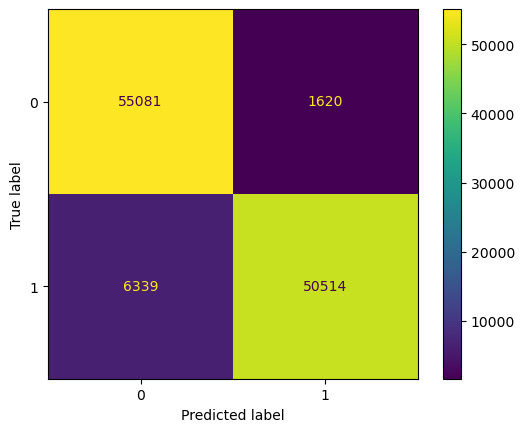

In [23]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred)
print(cnf_matrix)

# Plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)
disp.plot();

**50,498 True Positive values and 55089 True Negative values is a good start and shows the model has a bright future before trying other techniques to see if we can boost the model perfomance the to reduce the number of false positives and false negatives in the model.**

We now want to plot an ROC Curve to see how good the model does in differenting between 1 and 0 values so that we can know if the model is biased against one value.

0.9789976247255071


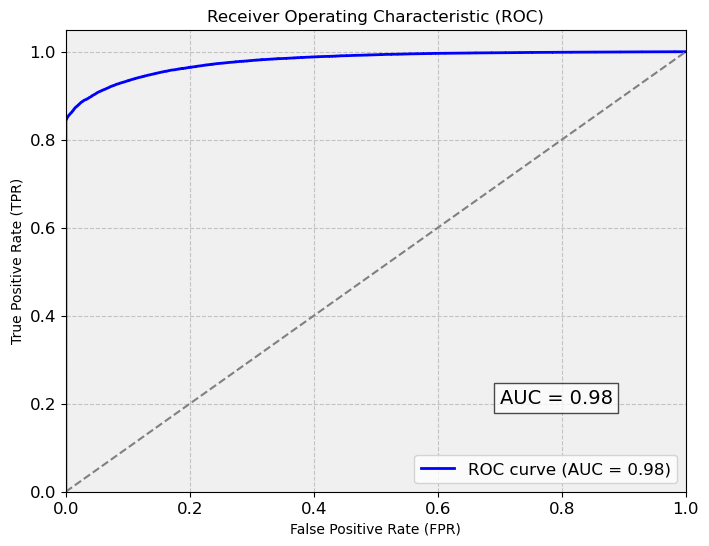

In [24]:

# Getting the decision function scores for the positive class
decision_scores = model.decision_function(X_test_scaled)

# Calculating the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

# Calculating the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, decision_scores)

# Plotting the ROC curve
print(roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color
plt.gca().set_facecolor('#f0f0f0')

# Customizing tick labels
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(axis='y', colors='black', labelsize=12)

# Customizing the legend
plt.legend(loc='lower right', fontsize=12)

# Adding a text box with the AUC score
plt.text(0.7, 0.2, f'AUC = {roc_auc:.2f}', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))
plt.show()

**An AUC score is very good as it shows the model does not favour one value of the target variable over the other. Now lets see if we can improve the results of the model.**